In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from imblearn.datasets import fetch_datasets

In [4]:
data=fetch_datasets()['protein_homo']

In [5]:
df=pd.DataFrame(data=data.data,columns=[str(i) for i in range(74)])

In [6]:
df['target']=data.target

In [7]:
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
145622,78.24,18.82,-0.64,-3.5,44.5,2098.2,0.00,-1.38,-6.5,-53.0,...,1993.4,0.54,-0.60,-12.0,-89.0,99.1,1.52,0.30,0.30,-1
12075,38.10,33.93,-0.57,-38.0,12.5,1712.6,-1.13,0.53,3.0,-69.5,...,786.7,1.20,-3.56,-3.0,-26.0,357.7,0.78,0.17,-0.07,-1
420,16.00,50.00,0.17,-3.5,3.5,968.7,-0.24,-1.50,3.0,-36.0,...,528.0,0.58,-1.65,-3.0,-19.0,-2.2,1.25,1.00,0.16,-1


In [8]:
df['target']=df['target'].map({-1:0,1:1})

In [9]:
df.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
30869,86.73,23.47,1.34,-16.5,10.5,1105.6,-0.45,-1.00,-12.0,-42.0,...,1092.9,0.88,0.78,12.0,-43.0,400.5,0.28,-0.11,-0.77,0
71122,62.40,24.36,-0.07,12.5,16.0,1748.8,-0.93,0.79,28.5,-77.0,...,1417.3,0.42,0.47,-6.0,-33.0,204.0,0.58,0.42,0.74,0
14687,67.74,21.43,-1.59,-64.0,70.5,1709.2,-0.70,-0.77,-19.0,-51.0,...,533.1,0.02,0.67,3.0,-40.0,-33.7,1.15,0.58,0.63,0


In [11]:
# Percentage of each class
df['target'].value_counts()*100/len(df)

0    99.110812
1     0.889188
Name: target, dtype: float64

In [12]:
df.shape

(145751, 75)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop(['target'],axis=1)
y=df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102025, 74)
(43726, 74)
(102025,)
(43726,)


## Importing Metrics and models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve

from yellowbrick.classifier import ROCAUC

# Baseline Model 
### (all classified as majority class)

In [18]:
y_base_train=pd.Series(np.zeros(len(X_train)))
y_base_test=pd.Series(np.zeros(len(X_test)))

# Random Forest Classifier

In [30]:
rf=RandomForestClassifier(max_depth=4,n_jobs=-1,random_state=20,n_estimators=50)

rf.fit(X_train,y_train)

y_rf_proba=rf.predict_proba(X_test)[:,1]

# Logistic Regression Classifier

In [31]:
logit=LogisticRegression(max_iter=200,random_state=20)

logit.fit(X_train,y_train)

y_logit_proba=logit.predict_proba(X_test)[:,1]

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# ROC_AUC

In [32]:
print('Baseline AUC:{}'.format(roc_auc_score(y_test,y_base_test)))
print('Random Forest AUC:{}'.format(roc_auc_score(y_test,y_rf_proba)))
print('Logistic Regression AUC:{}'.format(roc_auc_score(y_test,y_logit_proba)))

Baseline AUC:0.5
Random Forest AUC:0.9646156555669264
Logistic Regression AUC:0.9819333194832376


# Plotting ROC curve

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


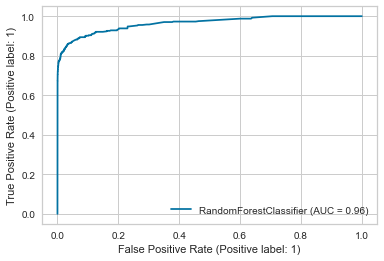

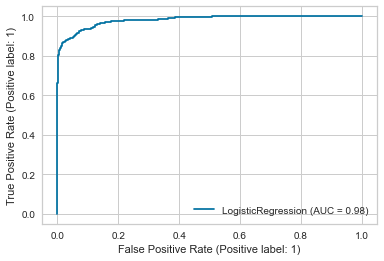

In [34]:
rf_disp=plot_roc_curve(rf,X_test,y_test)
logit_disp=plot_roc_curve(logit,X_test,y_test)

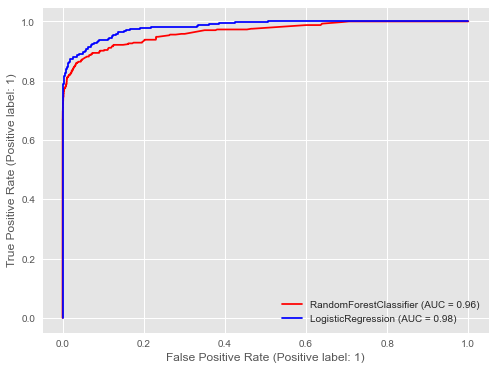

In [41]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
rf_disp.plot(ax=ax,color='red')
logit_disp.plot(ax=ax,color='blue')

# ROC_AUC with Yellowbrick

C:\Users\ABHIGYAN\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


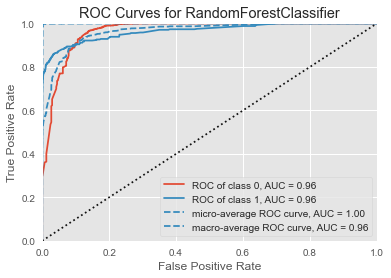

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
yellow_viz=ROCAUC(rf)

yellow_viz.fit(X_train,y_train)
yellow_viz.score(X_test,y_test)
yellow_viz.show()